In [204]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from env import get_db_url
import wrangle_mall

np.random.seed(4)



In [12]:
iris = sns.load_dataset('iris')

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
train, validate, test = wrangle_mall.split_data(iris)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [17]:
X = train[['petal_width','sepal_width']]

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2], dtype=int32)

In [28]:
train['cluster'] = kmeans.predict(X)

Text(0.5, 1.0, 'No clusters')

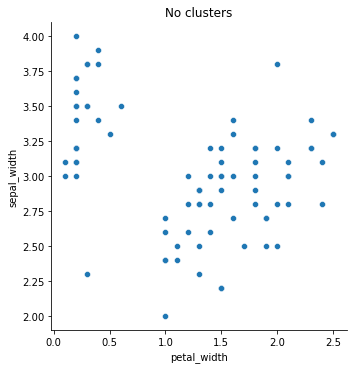

In [29]:
sns.relplot(data = train, x='petal_width', y='sepal_width')
plt.title("No clusters")

Text(0.5, 1.0, 'With 3 clusters')

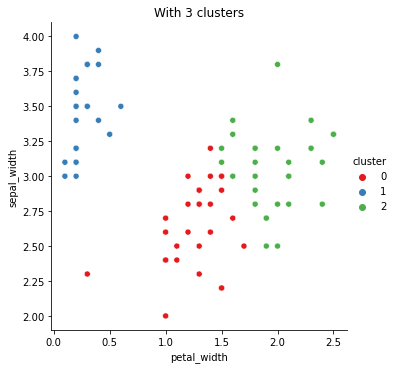

In [33]:
sns.relplot(data = train, x='petal_width', y='sepal_width', hue = 'cluster', palette='Set1')
plt.title("With 3 clusters")

Text(0.5, 1.0, 'Actual species')

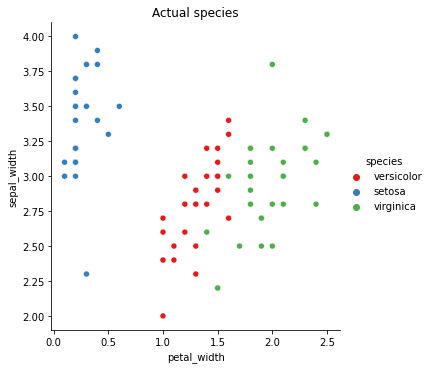

In [34]:
sns.relplot(data = train, x='petal_width', y='sepal_width', hue = 'species', palette='Set1')
plt.title("Actual species")

In [37]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,1.263333,2.660000
1,0.260000,3.440000
2,1.979310,3.055172


In [41]:
train.groupby('cluster')['petal_width', 'sepal_width'].mean()


,petal_width,sepal_width
cluster,,
0,1.263333,2.660000
1,0.260000,3.440000
2,1.979310,3.055172


Text(0.5, 1.0, 'Visualizing Cluster Centers')

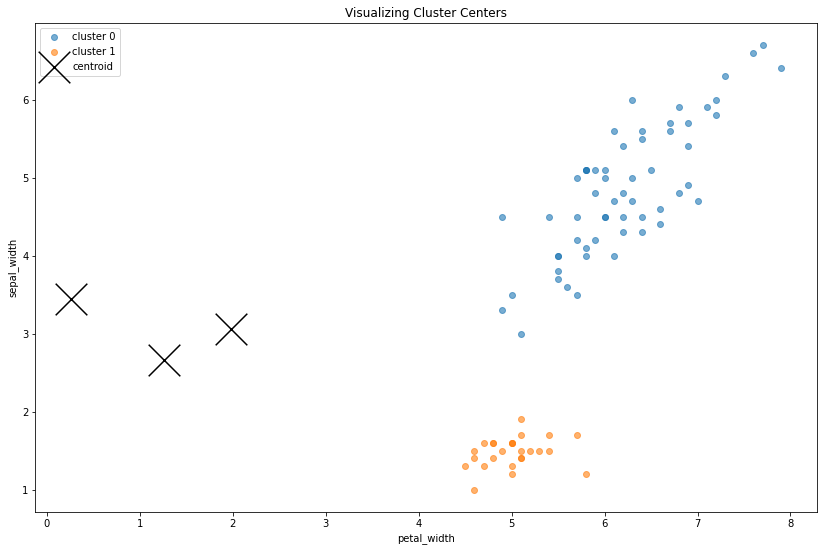

In [46]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='petal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')


Text(0.5, 1.0, '2 cluster')

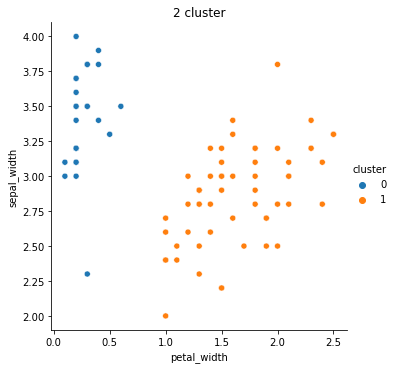

In [49]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster')
plt.title("2 cluster")


Text(0.5, 1.0, '5 clusters')

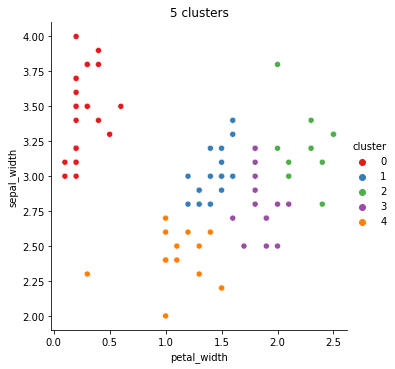

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster', palette='Set1')
plt.title("5 clusters")


### elbow

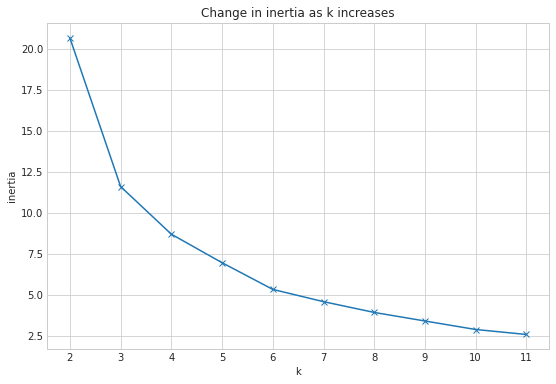

In [52]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


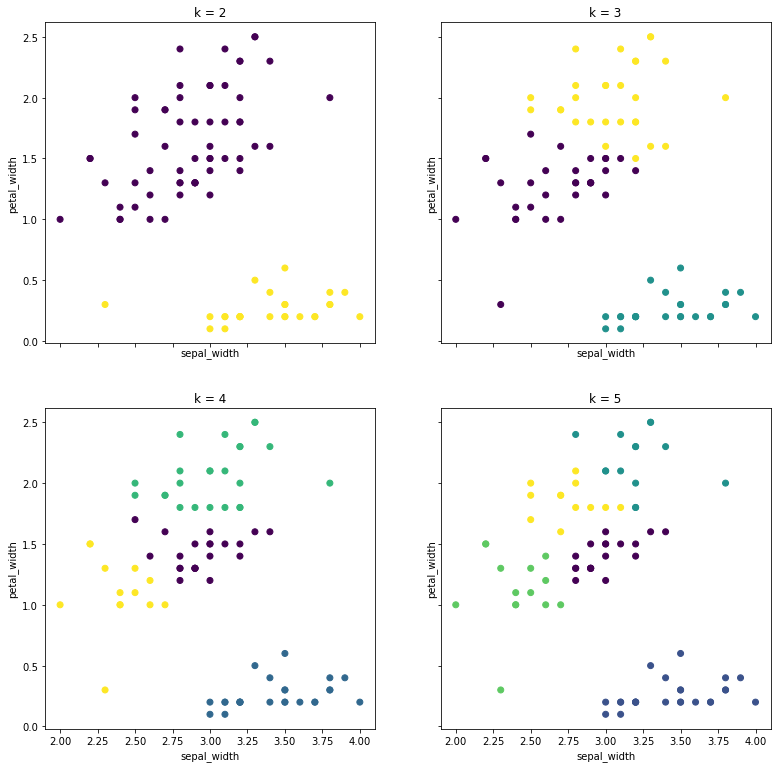

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_width', ylabel='petal_width')


In [56]:
X = train[['petal_length','petal_width','sepal_length']]

In [58]:
kmean = KMeans(n_clusters=4)
kmean.fit(X)

KMeans(n_clusters=4)

In [59]:
train['cluster'] = kmean.predict(X)

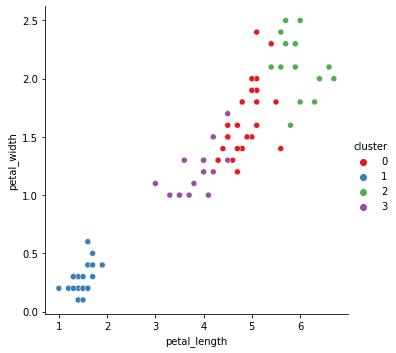

In [62]:
sns.relplot(data = train, x='petal_length', y = 'petal_width', hue = 'cluster', palette='Set1')

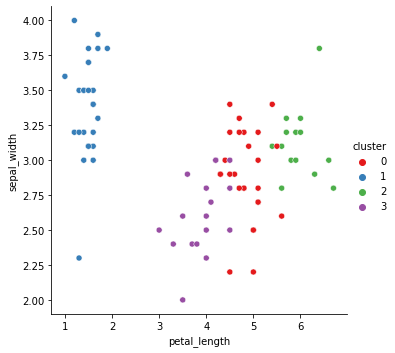

In [63]:
sns.relplot(data = train, x='petal_length', y = 'sepal_width', hue = 'cluster', palette='Set1')

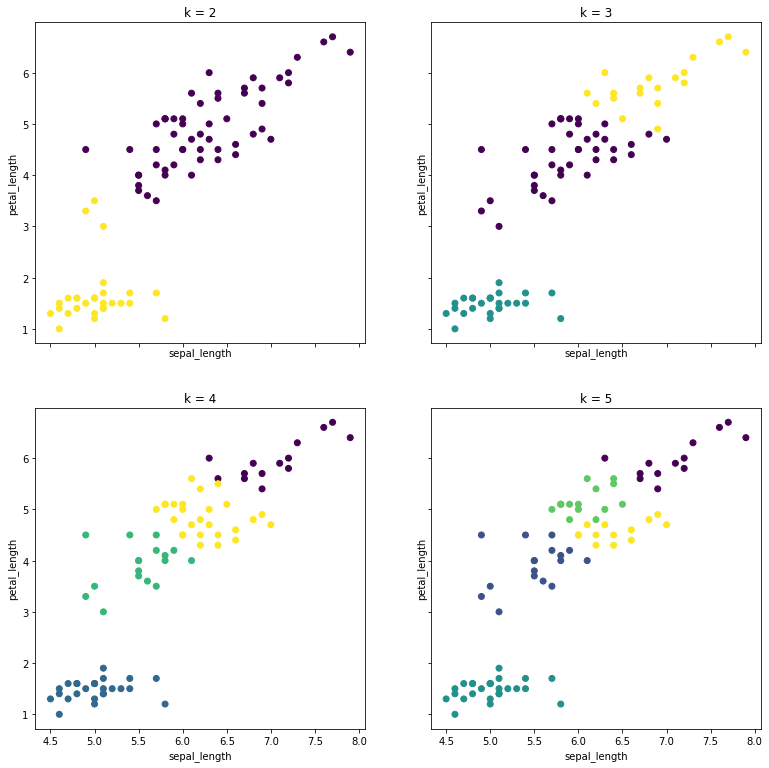

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_length', ylabel='petal_length')



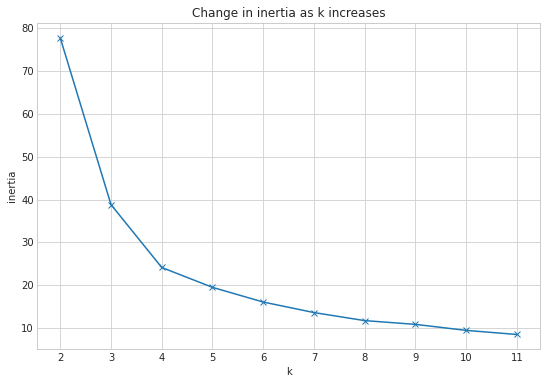

In [68]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')



## After 4 dropoff not so much

In [73]:
train, validate, test = wrangle_mall.wrangle_mall()

Using cached data
Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [74]:
train

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
123,124,39,69,91,1,0.403846,0.442623,0.957447
76,77,45,54,53,0,0.519231,0.319672,0.553191
171,172,28,87,75,1,0.192308,0.590164,0.787234
10,11,67,19,14,1,0.942308,0.032787,0.138298
35,36,21,33,81,0,0.057692,0.147541,0.851064
...,...,...,...,...,...,...,...,...
175,176,30,88,86,0,0.230769,0.598361,0.904255
101,102,49,62,48,0,0.596154,0.385246,0.500000
148,149,34,78,22,0,0.307692,0.516393,0.223404
99,100,20,61,49,1,0.038462,0.377049,0.510638


#### Will try clustering on age and gender

In [84]:
X = train[['age_scaled','gender_Male']]

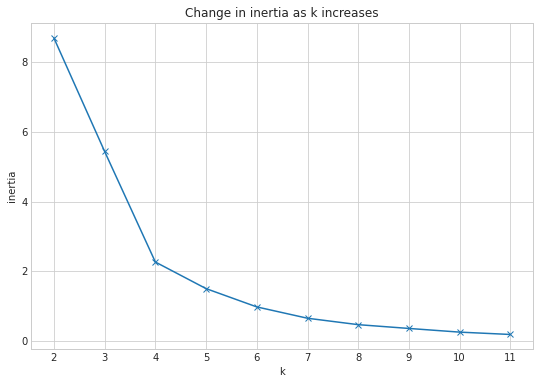

In [85]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Four looks good

In [86]:
kmean = KMeans(n_clusters=4)
kmean.fit(X)

KMeans(n_clusters=4)

In [87]:
train['cluster'] = kmean.predict(X)

In [90]:
# clustering by age and gender
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,95.821429,51.285714,60.392857,37.285714,0.0,0.640110,0.372073,0.386018
1,103.464286,29.357143,62.392857,58.428571,1.0,0.218407,0.388466,0.610942
2,85.933333,59.000000,54.600000,42.333333,1.0,0.788462,0.324590,0.439716
3,103.829268,28.292683,60.756098,61.292683,0.0,0.197936,0.375050,0.641412


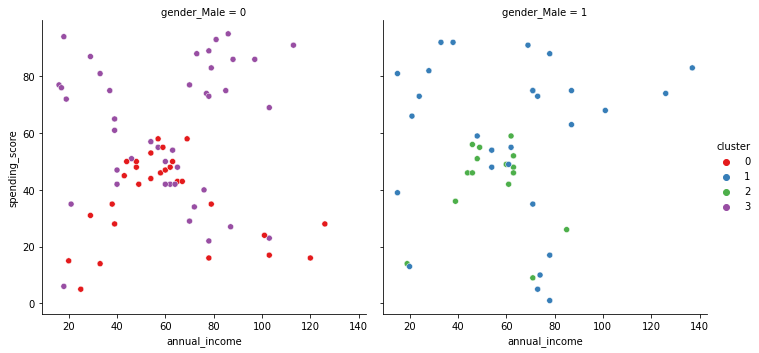

In [94]:
sns.relplot(data = train, x = 'annual_income', y='spending_score', hue='cluster', col='gender_Male', palette='Set1')

### Not very effective

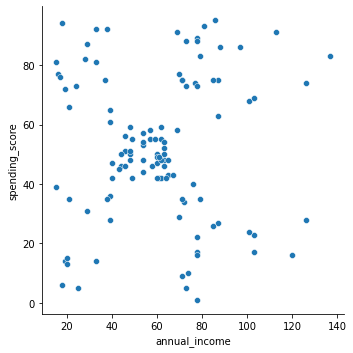

In [97]:
sns.relplot(data = train, x='annual_income', y = 'spending_score')

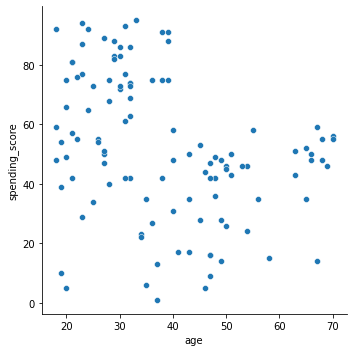

In [98]:
sns.relplot(data = train, x='age', y = 'spending_score')


In [112]:
X = train[['age_scaled', 'annual_income_scaled']]

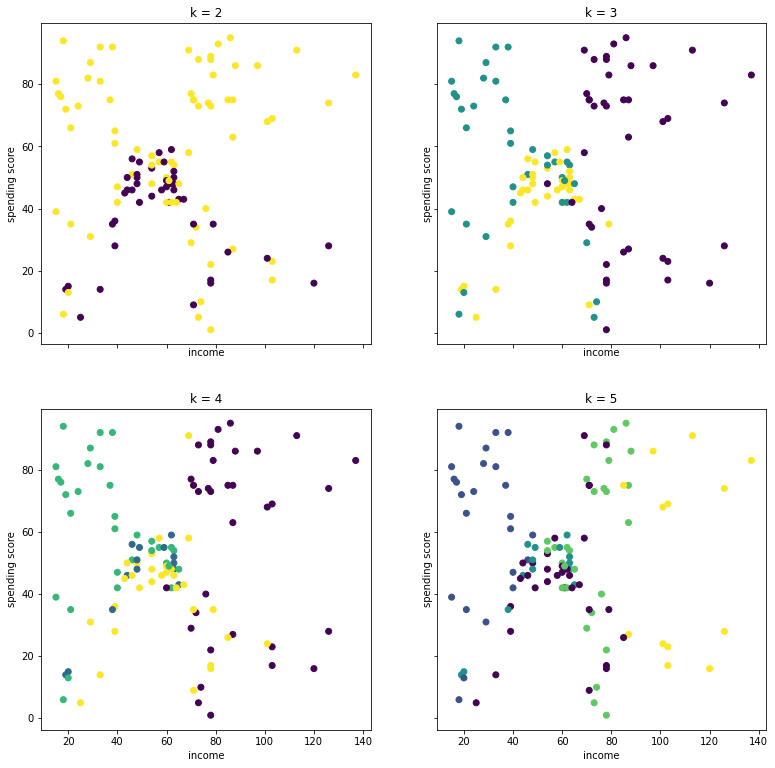

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='income', ylabel='spending score')




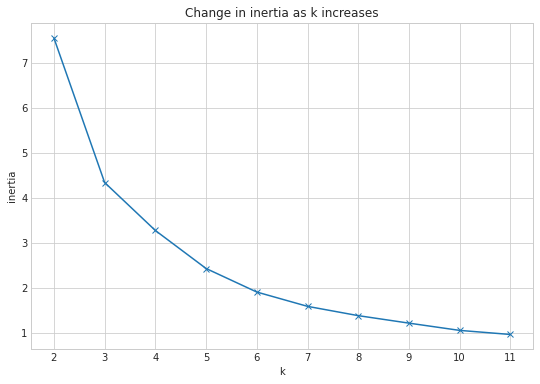

In [114]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [222]:
7.5-3

4.5

## 3 looks best


In [115]:
kmean=KMeans(n_clusters=3)
kmean.fit(X)

train['cluster'] = kmean.predict(X)

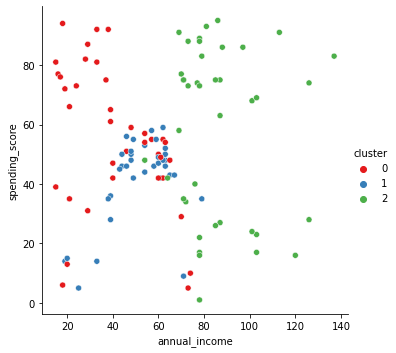

In [116]:
sns.relplot(data = train, x='annual_income', y='spending_score', hue = 'cluster', palette = 'Set1')

### Clustering on age and income doesn't seem to segment data so meaningfully

In [117]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled,cluster
123,124,39,69,91,1,0.403846,0.442623,0.957447,2
76,77,45,54,53,0,0.519231,0.319672,0.553191,1
171,172,28,87,75,1,0.192308,0.590164,0.787234,2
10,11,67,19,14,1,0.942308,0.032787,0.138298,1
35,36,21,33,81,0,0.057692,0.147541,0.851064,0


In [118]:
# Will try clustering on age, income, and spending score
X=train[['age_scaled','annual_income_scaled','spending_score_scaled']]

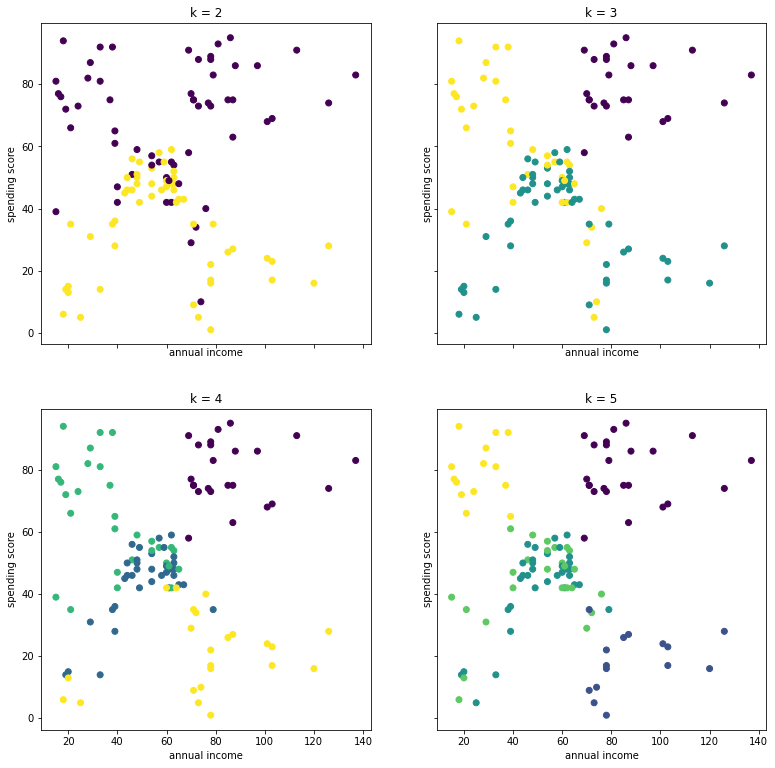

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score')





In [123]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)

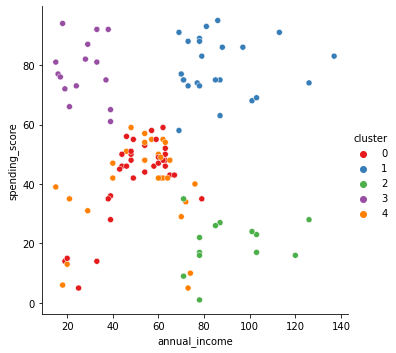

In [126]:
sns.relplot(data = train, x='annual_income', y = 'spending_score', hue = 'cluster', palette='Set1')

In [127]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,76.500000,56.176471,50.823529,42.764706,0.382353,0.734163,0.293635,0.444305
1,160.708333,32.791667,86.541667,79.250000,0.416667,0.284455,0.586407,0.832447
2,166.384615,42.923077,90.692308,20.076923,0.384615,0.479290,0.620429,0.202946
3,24.533333,23.600000,27.066667,78.266667,0.400000,0.107692,0.098907,0.821986
4,82.192308,26.692308,52.230769,39.884615,0.346154,0.167160,0.305170,0.413666


<AxesSubplot:xlabel='cluster'>

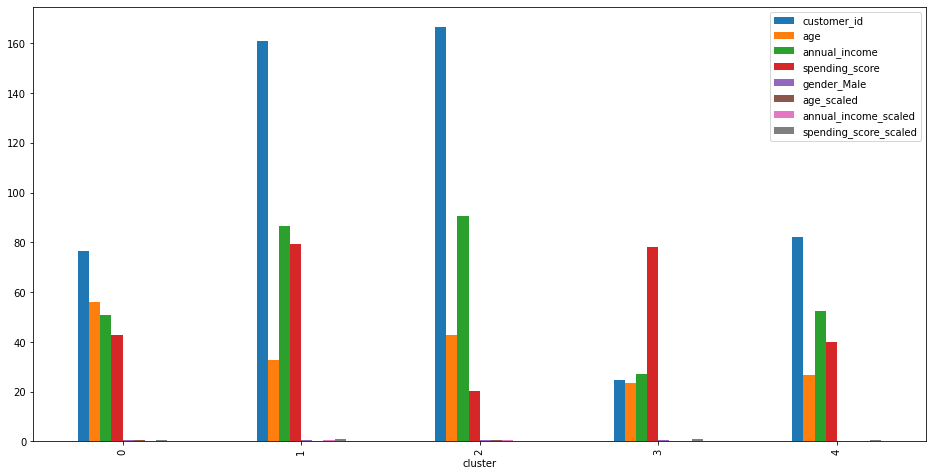

In [137]:
train.groupby('cluster').mean().plot.bar(figsize=(16,8))


## not so effective. will try just spending score and annual income

In [138]:
X=train[['spending_score_scaled', 'annual_income_scaled']]

Best k value: 5


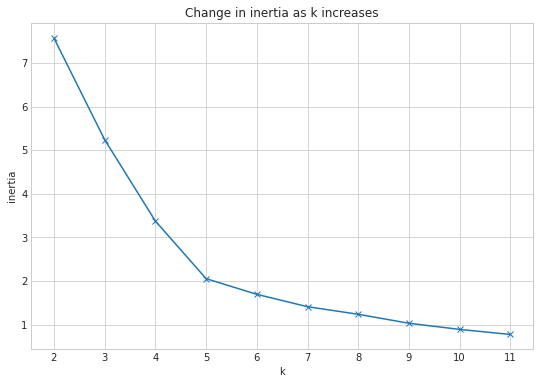

In [172]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    zz=pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)})
    zz.plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Calculates where slope stops dropping off - elbow method. Should yield best k value
inertias = pd.DataFrame(zz, columns = ['inertia'])

inertias["shifted"] = inertias.shift(1)

inertias["difference"] = inertias.inertia-inertias.shifted

inertias["pct_difference"]=inertias.difference/inertias.inertia

print(f"Best k value: {inertias.pct_difference.idxmin()}")

In [174]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [175]:
train['cluster']=kmeans.predict(X)

In [177]:
train.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
cluster,,,,,,,,
0,158.666667,38.944444,85.944444,20.777778,0.388889,0.402778,0.581512,0.210402
1,23.142857,23.071429,26.214286,79.500000,0.428571,0.097527,0.091920,0.835106
2,23.333333,45.666667,26.333333,22.583333,0.333333,0.532051,0.092896,0.229610
3,87.377778,44.088889,55.777778,49.466667,0.355556,0.501709,0.334244,0.515603
4,162.347826,32.478261,87.304348,80.173913,0.434783,0.278428,0.592659,0.842276


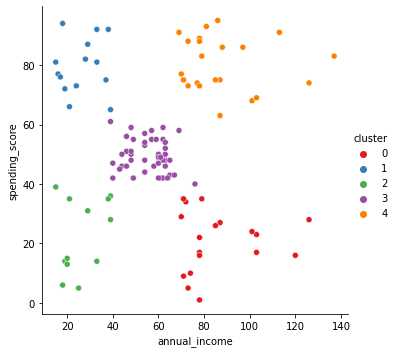

In [179]:
sns.relplot(data = train, x='annual_income', y = 'spending_score', hue='cluster', palette='Set1')

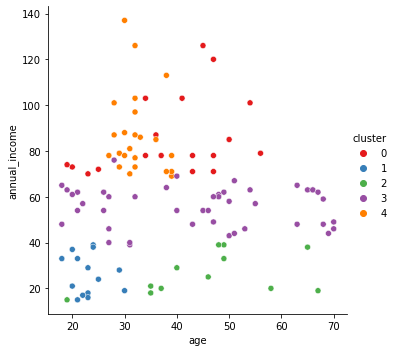

In [182]:
sns.relplot(data = train, x='age', y = 'annual_income', hue='cluster', palette='Set1')

## Yep, that does it best:
- low income, young (1)
- low income, older (2)
- middle income, all ages (3)
- high income, young (4)
- high income, older (0)

# Bonus

In [187]:
url = "https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0"
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

In [190]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


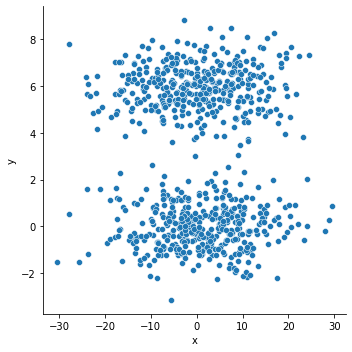

In [191]:
sns.relplot(data = df, x='x', y='y')

Looks like two oval clusters

In [198]:
X=df

Best k value: 3


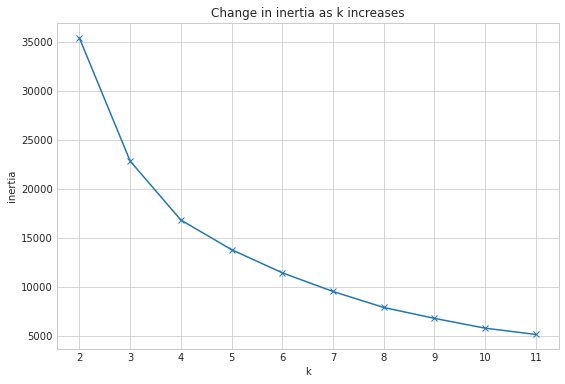

In [199]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    zz=pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)})
    zz.plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Calculates where slope stops dropping off - elbow method. Should yield best k value
inertias = pd.DataFrame(zz, columns = ['inertia'])

inertias["shifted"] = inertias.shift(1)

inertias["difference"] = inertias.inertia-inertias.shifted

inertias["pct_difference"]=inertias.difference/inertias.inertia

print(f"Best k value: {inertias.pct_difference.idxmin()}")

In [200]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [201]:
df['cluster'] = kmeans.predict(X)

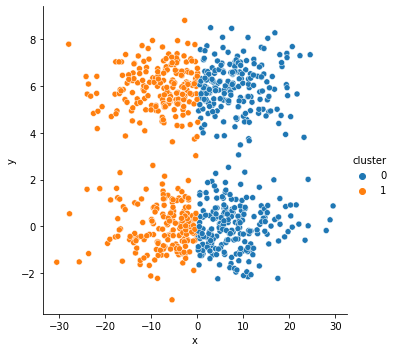

In [203]:
sns.relplot(data = df, x='x', y='y', hue='cluster')

# WOH!!! NOT WHAT I EXPECTED!!!!

In [205]:
scaler = MinMaxScaler()

In [207]:
df

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0
...,...,...,...
795,3.941363,5.807617,0
796,6.057122,6.010463,0
797,8.373651,4.641515,0
798,-2.058756,6.077125,1


In [217]:
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns = ["x_scaled","y_scaled","cluster"])

In [218]:
X = scaled_df[['x_scaled','y_scaled']]

In [219]:
kmean = KMeans(n_clusters=2)
kmean.fit(X)
scaled_df["cluster"] = kmean.predict(X)

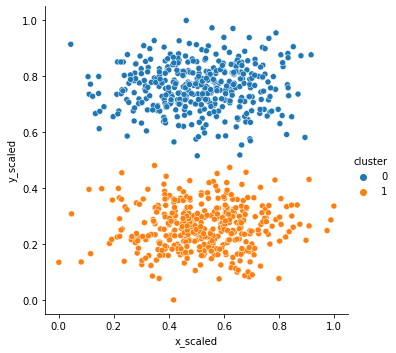

In [220]:
sns.relplot(data = scaled_df, x='x_scaled', y='y_scaled', hue='cluster')

# GOT IT!!!

### Scaled data is important  for kmeans as it relies on distance. Can through off results if unscaled.

# How to choose which features to cluster and in which combinations?
# How to choose k value algorithmically